Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

First Identified: December 2019 in Wuhan, the capital of Hubei province, China.
Most common symptoms:fever.dry cough.tiredness.
Less common symptoms:aches and pains.sore throat.diarrhoea.conjunctivitis.headache.loss of taste or smell.
Risk factors: Travel, Viral Exposure.
Prevention: Hand Washing, Face Coverings, Quarantine, Social Distancing.
More Info:https://www.who.int/health-topics/coronavirus#tab=tab_1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#sns.set_palette(sns.xkcd_palette(sample_colors))
import warnings
warnings.filterwarnings("ignore")

In [2]:
def my_df_summary(data):
    '''Summarizing Function'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Minimum', 'Maximum', 'Mittelwert', 'Stand. Abw.','#NA', '#Uniques', 'dtypes'])        
        return df
    except:
        print('No Summary.')
        return data  


In [3]:
#Die einmal gesetzten Parameter greifen für alle nachfolgenden Plots, die mit plt erzeugt wurden.
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=12)   # fontsize of the figure title
plt.rc('lines', linewidth=10, color='r')
plt.rcParams['figure.figsize']=(16,8)
Set1=['Red', 'Yellow', 'Navy', 'pink','purple','black','Blue']

In [4]:
#df = pd.read_csv('.csv', sep=';', header=None)

corona = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
corona.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-15 19:32:22,-25.000000,133.000000,7020.0,98.0,6338.0,584.0,27.572988,NaN,NaN,1.396011,36,AUS
1,Austria,2020-05-15 19:32:22,47.516200,14.550100,16109.0,628.0,14471.0,1010.0,178.861698,NaN,NaN,3.898442,40,AUT
2,Canada,2020-05-15 19:32:22,60.001000,-95.001000,75667.0,5652.0,36763.0,33252.0,199.882702,NaN,NaN,7.469571,124,CAN
3,China,2020-05-15 19:32:22,30.592800,114.305500,84031.0,4637.0,79273.0,121.0,5.982232,NaN,NaN,5.518202,156,CHN
4,Denmark,2020-05-15 19:32:22,56.000000,10.000000,10989.0,537.0,9157.0,1295.0,189.720561,NaN,NaN,4.886705,208,DNK
5,Finland,2020-05-15 19:32:22,61.924100,25.748200,6228.0,293.0,5000.0,935.0,112.404205,NaN,NaN,4.704560,246,FIN
6,France,2020-05-15 19:32:22,46.227600,2.213700,179630.0,27532.0,60562.0,91536.0,275.195856,NaN,NaN,15.327061,250,FRA
7,Germany,2020-05-15 19:32:22,51.165691,10.451526,175233.0,7897.0,151597.0,15739.0,209.148662,NaN,NaN,4.506571,276,DEU
8,Iceland,2020-05-15 19:32:22,64.963100,-19.020800,1802.0,10.0,1782.0,10.0,528.058608,NaN,NaN,0.554939,352,ISL
9,Ireland,2020-05-15 19:32:22,53.142400,-7.692100,23956.0,1518.0,19470.0,2968.0,485.155725,NaN,NaN,6.336617,372,IRL


In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
Country_Region         188 non-null object
Last_Update            188 non-null object
Lat                    186 non-null float64
Long_                  186 non-null float64
Confirmed              188 non-null float64
Deaths                 188 non-null float64
Recovered              188 non-null float64
Active                 188 non-null float64
Incident_Rate          186 non-null float64
People_Tested          0 non-null float64
People_Hospitalized    0 non-null float64
Mortality_Rate         188 non-null float64
UID                    188 non-null int64
ISO3                   186 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 20.7+ KB


In [6]:
corona1=corona.dropna(how='all', axis=1)
#corona.drop(['People_Hospitalized'], axis=1)

In [7]:
corona1.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
0,Australia,2020-05-15 19:32:22,-25.000000,133.000000,7020.0,98.0,6338.0,584.0,27.572988,1.396011,36,AUS
1,Austria,2020-05-15 19:32:22,47.516200,14.550100,16109.0,628.0,14471.0,1010.0,178.861698,3.898442,40,AUT
2,Canada,2020-05-15 19:32:22,60.001000,-95.001000,75667.0,5652.0,36763.0,33252.0,199.882702,7.469571,124,CAN
3,China,2020-05-15 19:32:22,30.592800,114.305500,84031.0,4637.0,79273.0,121.0,5.982232,5.518202,156,CHN
4,Denmark,2020-05-15 19:32:22,56.000000,10.000000,10989.0,537.0,9157.0,1295.0,189.720561,4.886705,208,DNK
5,Finland,2020-05-15 19:32:22,61.924100,25.748200,6228.0,293.0,5000.0,935.0,112.404205,4.704560,246,FIN
6,France,2020-05-15 19:32:22,46.227600,2.213700,179630.0,27532.0,60562.0,91536.0,275.195856,15.327061,250,FRA
7,Germany,2020-05-15 19:32:22,51.165691,10.451526,175233.0,7897.0,151597.0,15739.0,209.148662,4.506571,276,DEU
8,Iceland,2020-05-15 19:32:22,64.963100,-19.020800,1802.0,10.0,1782.0,10.0,528.058608,0.554939,352,ISL
9,Ireland,2020-05-15 19:32:22,53.142400,-7.692100,23956.0,1518.0,19470.0,2968.0,485.155725,6.336617,372,IRL


In [8]:
corona1.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID
count,186.000000,186.000000,1.880000e+02,188.000000,188.000000,1.880000e+02,186.000000,188.000000,188.000000
mean,20.171332,17.528336,2.402319e+04,1627.930851,8629.542553,1.375358e+04,102.774448,3.967008,518.771277
std,23.792858,57.379139,1.124616e+05,7771.316792,28503.120989,8.330415e+04,228.512862,4.359391,963.043369
min,-40.900600,-102.552800,1.000000e+00,0.000000,0.000000,0.000000e+00,0.046680,0.000000,4.000000
25%,5.470062,-7.542225,2.272500e+02,4.000000,61.000000,6.625000e+01,3.768509,0.941729,207.000000
50%,18.853450,19.438845,1.114500e+03,24.500000,511.500000,4.170000e+02,18.742857,2.887177,420.000000
75%,40.980892,44.698473,8.560000e+03,226.750000,3368.500000,3.270000e+03,107.967617,5.707338,659.750000
max,64.963100,178.065000,1.432045e+06,86851.000000,246414.000000,1.096498e+06,1921.150333,32.000000,9999.000000


In [9]:
#name of columns
corona1.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate', 'UID',
       'ISO3'],
      dtype='object')

In [10]:
#number of infected countries
corona1['Country_Region'].count()

188

In [11]:
#corona1['Deaths']

In [12]:
involved_countries=corona1['Country_Region'].unique().tolist()
involved_countries[20:30]

['Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain']

In [13]:
Total_death=corona1['Deaths'].sum()
print('\nGlobal Death from Corona Infection:\n{}\n'.format(Total_death))


Global Death from Corona Infection:
306051.0



In [14]:
#where no dead is reported
no_dead_countries=list(corona1.loc[corona1['Deaths'] == 0, 'Country_Region'])
len(no_dead_countries)

25

In [15]:
#The country with the most dead
most_dead_country=list(corona1.loc[corona1['Deaths'] == corona1['Deaths'].max() , 'Country_Region'])
most_dead_country
print('{} reported the most dead from with total of Corona {}'.format(most_dead_country, corona1['Deaths'].max()))

['US'] reported the most dead from with total of Corona 86851.0


In [16]:
corona1.loc[corona1.Country_Region == 'US','Deaths']

17    86851.0
Name: Deaths, dtype: float64

In [17]:
corona1.loc[corona1.Country_Region == 'US',  'Recovered'] 

17    246414.0
Name: Recovered, dtype: float64

In [18]:
#Ranking the table based on the number of deads
sort_by_death = corona1.sort_values('Deaths',ascending=False)
sort_by_death.head(3)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
17,US,2020-05-15 19:32:22,40.0000,-100.0000,1432045.0,86851.0,246414.0,1096498.0,434.656010,6.064823,840,USA
16,United Kingdom,2020-05-15 19:32:22,55.0000,-3.0000,238003.0,34078.0,1045.0,202880.0,350.592149,14.318307,826,GBR
10,Italy,2020-05-15 19:32:22,41.8719,12.5674,223885.0,31610.0,120205.0,72070.0,370.291484,14.118856,380,ITA


In [19]:
sort_by_death['Death_Rate'] = sort_by_death['Deaths'] / sort_by_death['Confirmed'] * 100
sort_by_death['Recovery_Rate'] = sort_by_death['Recovered'] / sort_by_death['Confirmed'] * 100
sort_by_death['Incident_Rate'].fillna(0, inplace=True)
sort_by_death.drop(['Last_Update', 'Lat', 'Long_', 'UID', 'ISO3', 'Mortality_Rate'], axis=1).head(10)\
.style.hide_index()\
.background_gradient(cmap='Blues',subset=["Confirmed"])\
.background_gradient(cmap='Reds',subset=["Deaths"])\
.background_gradient(cmap='Greens',subset=["Recovered"])\
.background_gradient(cmap='Purples',subset=["Active"])\
.background_gradient(cmap='GnBu',subset=["Incident_Rate"])\
.background_gradient(cmap='OrRd',subset=["Death_Rate"])\
.background_gradient(cmap='PuBu',subset=["Recovery_Rate"])\



Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Death_Rate,Recovery_Rate
US,1.43204e+06,86851,246414,1.0965e+06,434.656,6.06482,17.2071
United Kingdom,238003,34078,1045,202880,350.592,14.3183,0.43907
Italy,223885,31610,120205,72070,370.291,14.1189,53.6905
France,179630,27532,60562,91536,275.196,15.3271,33.7149
Spain,230183,27459,144783,57941,492.32,11.9292,62.8991
Brazil,212198,14455,79479,118264,99.83,6.81203,37.4551
Belgium,54644,8959,14301,31384,471.491,16.3952,26.1712
Germany,175233,7897,151597,15739,209.149,4.50657,86.5117
Iran,116635,6902,91836,17897,138.863,5.91761,78.7379
Netherlands,43880,5662,159,38059,256.086,12.9034,0.362352


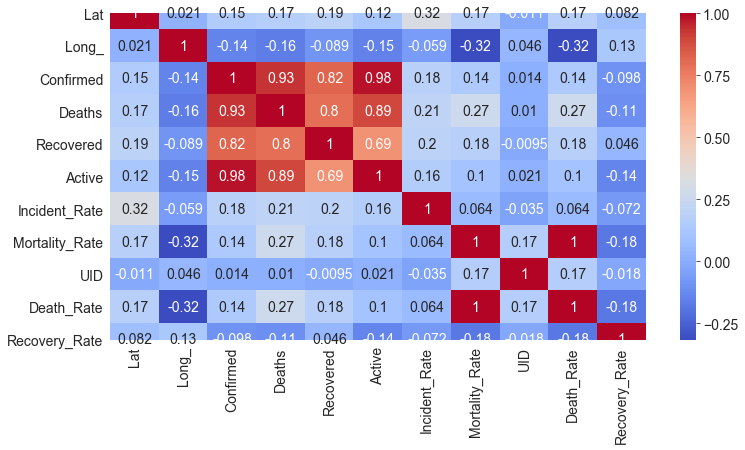

In [20]:
#Heat Map
sort_by_death.iloc[:,:].corr();
plt.figure(figsize=(12,6))
sns.heatmap(sort_by_death.corr(),cmap='coolwarm',annot=True)
plt.show()

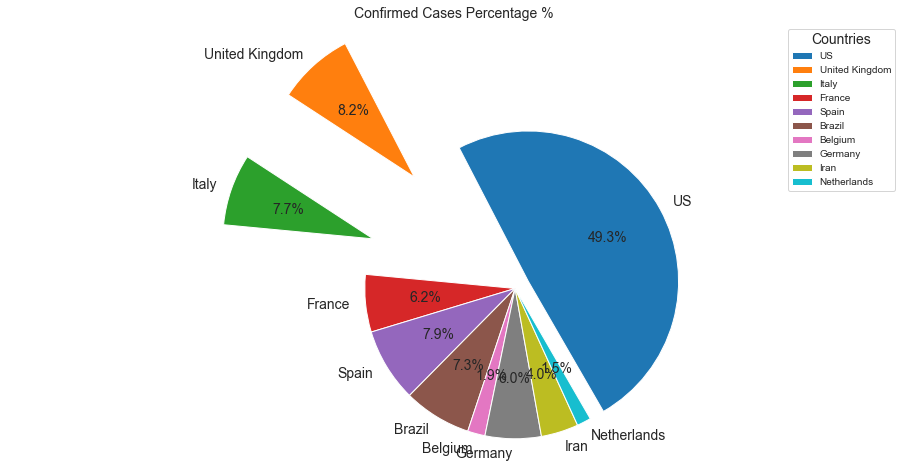

In [21]:
#confirmed cases percentages per Country
explodeTuple = (0.1, 1.0, 1.0, 0.0, 0.0, 0.0,0.0,.0,0.0,0.0)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Confirmed[0:10]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


# Plot
plt.pie(sizes, labels=labels, 
        explode=explodeTuple,
        
        #labels=pieLabels,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-60,
       )

plt.title("Confirmed Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

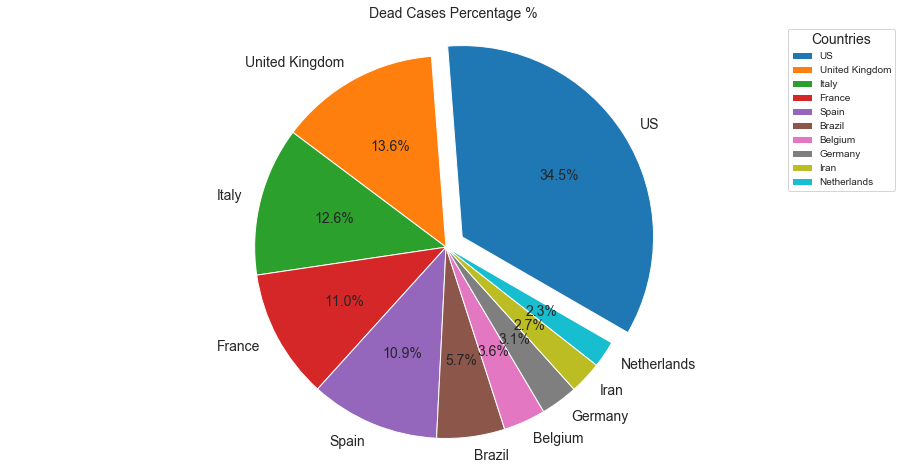

In [22]:
#Dead Cases Percentages per Country-Top 10
explodeTuple = (0.1,0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Deaths[0:10]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


# Plot
plt.pie(sizes, labels=labels, 
        explode=explodeTuple,
        #labels=pieLabels,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-30,
       )

plt.title("Dead Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

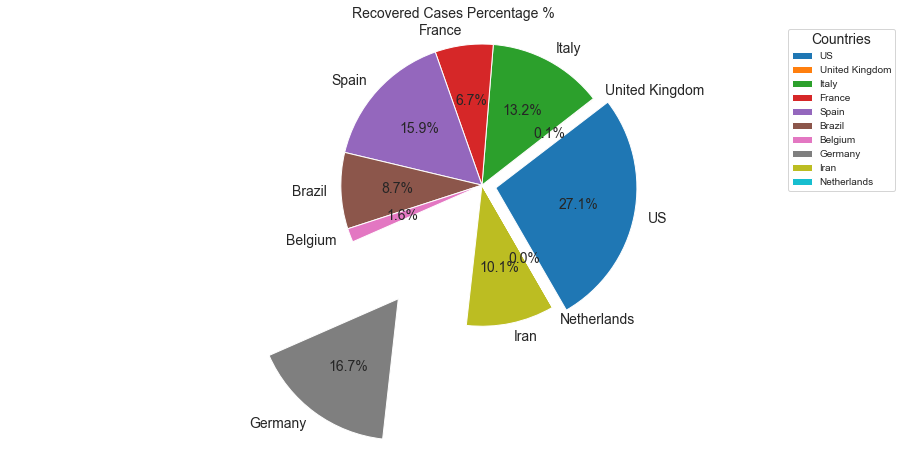

In [23]:
#Recovered Cases Percentages per Country-To 10
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,1.0,0.0,0.0)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Recovered[0:10]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


# Plot
plt.pie(sizes, labels=labels, 
        explode=explodeTuple,
        
        #labels=pieLabels,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-60,
       )

plt.title("Recovered Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

In [24]:
plt.rcParams['figure.figsize']=(10,8)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Deaths[0:10]

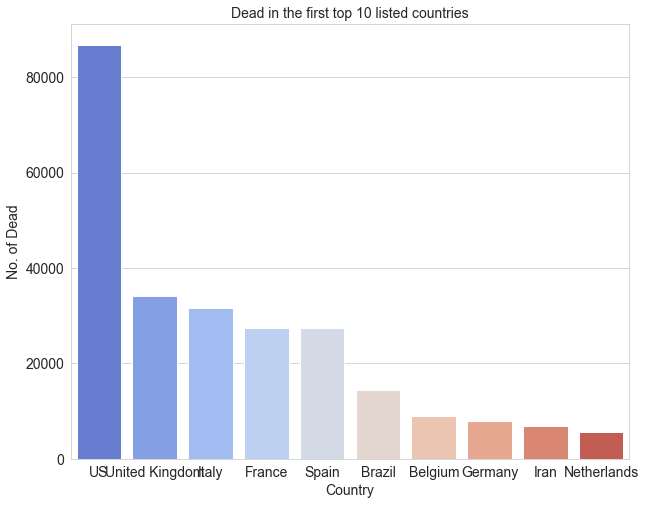

In [25]:
sns.barplot(x=labels, y=sizes, errwidth=2, data=corona1, palette="coolwarm").set(title = 'Dead in the first top 10 listed countries', xlabel = 'Country', ylabel = 'No. of Dead' )
plt.show()

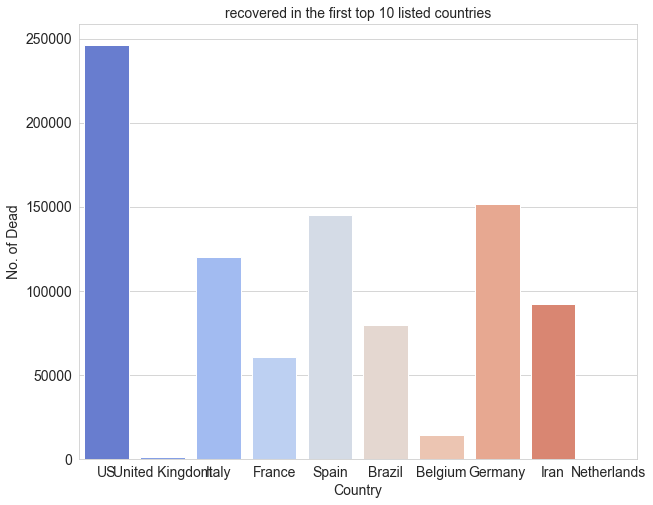

In [26]:
plt.rcParams['figure.figsize']=(10,8)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Recovered[0:10]
sns.barplot(x=labels, y=sizes, errwidth=2, data=corona1, palette="coolwarm").set(title = 'recovered in the first top 10 listed countries', xlabel = 'Country', ylabel = 'No. of Dead' )
plt.show()

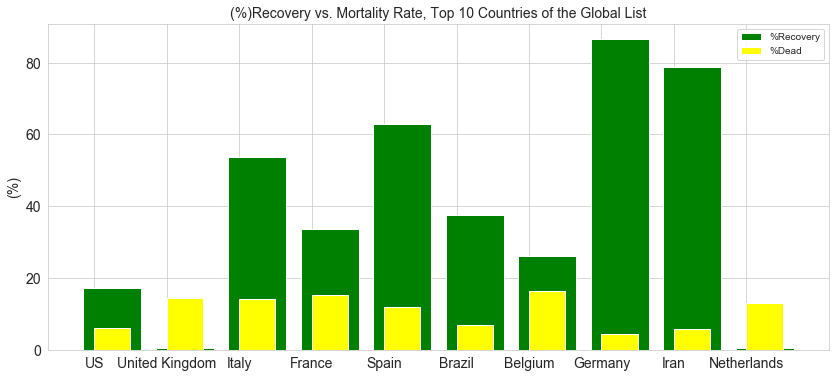

In [27]:
plt.rcParams['figure.figsize'] = [14, 6]
divisions = list(sort_by_death.Country_Region[0:10])
#Confirmed=sort_by_death.Confirmed[0:10]
Deads = sort_by_death.Death_Rate[0:10]
Recovery = sort_by_death.Recovery_Rate[0:10]

index = np.arange(10)
width = 0.5

#plt.bar(index, Confirmed, color='Red', label="%Confirmed")
plt.bar(index+width, Recovery, color='Green', label="%Recovery")
plt.bar(index+width, Deads, width, color='Yellow', label="%Dead")

plt.title("(%)Recovery vs. Mortality Rate, Top 10 Countries of the Global List")
#plt.xlabel("Countries")
plt.ylabel("(%)")
plt.xticks(index+width/2, divisions)
        
plt.legend(loc='best')        
plt.show()

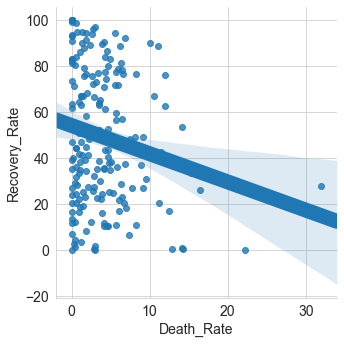

In [28]:
# LMplot 
sns.lmplot(x="Death_Rate", y="Recovery_Rate", data=sort_by_death)
plt.show()

# Time Serie Analysis

Daily report since beginning of the Pandemy in all countiries and updated up to today.

In [29]:
corona_cases_time = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv", parse_dates = ['Last_Update','Report_Date_String'])
corona_cases_time.head(10)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-23
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-24
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-25
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-26
5,Afghanistan,2020-01-27,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-27
6,Afghanistan,2020-01-28,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-28
7,Afghanistan,2020-01-29,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-29
8,Afghanistan,2020-01-30,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-30
9,Afghanistan,2020-01-31,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-31


In [30]:
corona_time = pd.read_csv('covid.csv', parse_dates = ['ObservationDate','Last Update'])
corona_time.head(100)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,96,2020-01-24,Anhui,Mainland China,2020-01-24 17:00:00,15.0,0.0,0.0
96,97,2020-01-24,Fujian,Mainland China,2020-01-24 17:00:00,10.0,0.0,0.0
97,98,2020-01-24,Henan,Mainland China,2020-01-24 17:00:00,9.0,0.0,0.0
98,99,2020-01-24,Jiangsu,Mainland China,2020-01-24 17:00:00,9.0,0.0,0.0


In [31]:
print ('Last update: ' + str(corona_time.ObservationDate.max()))

Last update: 2020-05-13 00:00:00


In [32]:
corona_time

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24446,24447,2020-05-13,Wyoming,US,2020-05-14 03:32:28,688.0,7.0,0.0
24447,24448,2020-05-13,Xinjiang,Mainland China,2020-05-14 03:32:28,76.0,3.0,73.0
24448,24449,2020-05-13,Yukon,Canada,2020-05-14 03:32:28,11.0,0.0,0.0
24449,24450,2020-05-13,Yunnan,Mainland China,2020-05-14 03:32:28,185.0,2.0,183.0


In [33]:
#the last 4 rows
corona_time.tail(4)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
24447,24448,2020-05-13,Xinjiang,Mainland China,2020-05-14 03:32:28,76.0,3.0,73.0
24448,24449,2020-05-13,Yukon,Canada,2020-05-14 03:32:28,11.0,0.0,0.0
24449,24450,2020-05-13,Yunnan,Mainland China,2020-05-14 03:32:28,185.0,2.0,183.0
24450,24451,2020-05-13,Zhejiang,Mainland China,2020-05-14 03:32:28,1268.0,1.0,1267.0


In [34]:
#cleaning
corona_time = corona_time.drop(['SNo', 'Last Update'], axis=1)
corona_time = corona_time.rename(columns={
    'ObservationDate': 'Date', 
    'Country/Region': 'Country_Region', 
    'Province/State': 'Province_State'
})
corona_time.head(2)

,Date,Province_State,Country_Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0


In [35]:
#the first and last recorde
(corona_time.Date.min(),corona_time.Date.max())

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-05-13 00:00:00'))

In [36]:
corona_time.shape

(24451, 6)

In [37]:
#calling the function my_df_summary() to summarize the time-serie records
my_df_summary(corona_time)

,Date,Confirmed,Deaths,Recovered,Province_State,Country_Region
Minimum,2020-01-22 00:00:00,0,0,0,NaN,NaN
Maximum,2020-05-13 00:00:00,340661,33186,243430,NaN,NaN
Mittelwert,NaN,5283.6,344.959,1545.8,NaN,NaN
Stand. Abw.,NaN,22362.4,2145.41,10108.2,NaN,NaN
#NA,986,986,986,986,13723,986
#Uniques,113,5774,1794,2598,157,220
dtypes,datetime64[ns],float64,float64,float64,object,object


# line plot of the full time series 

In [38]:
corona_time = corona_time.set_index('Date')
corona_time 

,Province_State,Country_Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
2020-05-13,Wyoming,US,688.0,7.0,0.0
2020-05-13,Xinjiang,Mainland China,76.0,3.0,73.0
2020-05-13,Yukon,Canada,11.0,0.0,0.0


Text(0, 0.5, 'No. of confirmed cases')

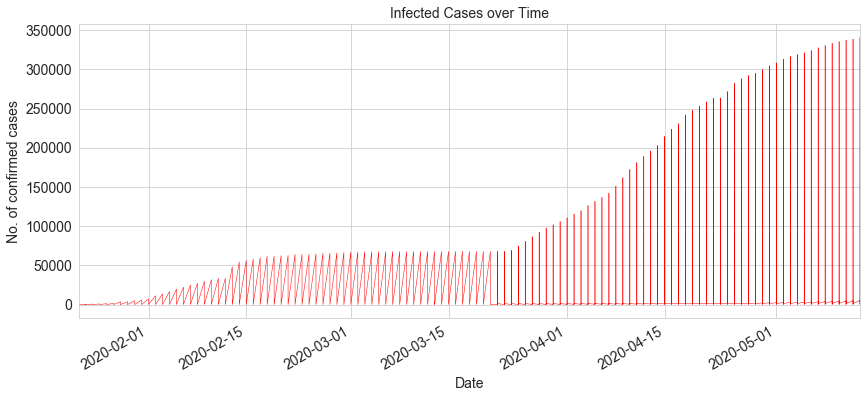

In [39]:
corona_time['Confirmed'].plot(linewidth=0.5, color='red');
plt.title('Infected Cases over Time', size=14)
plt.ylabel('No. of confirmed cases')

Text(0, 0.5, 'No. of dead cases')

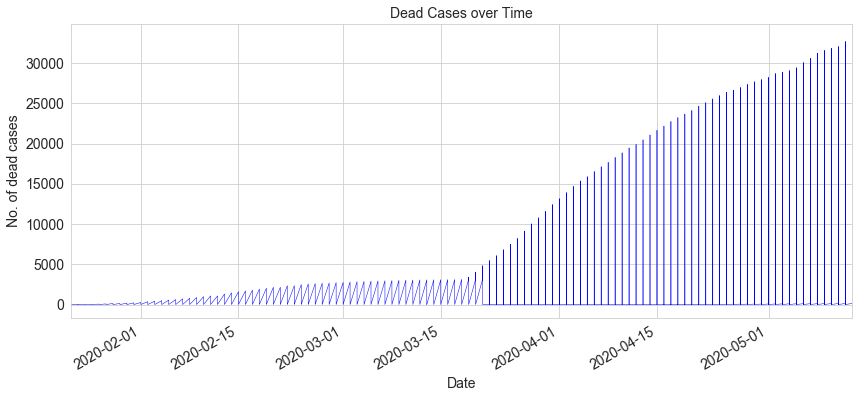

In [40]:
corona_time['Deaths'].plot(linewidth=0.5, color='blue');
plt.title('Dead Cases over Time', size=14)
plt.ylabel('No. of dead cases')

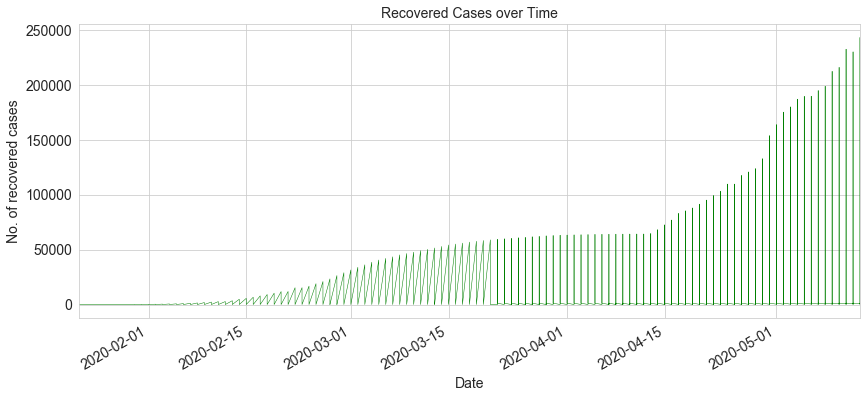

In [41]:
corona_time['Recovered'].plot(linewidth=0.5, color='green');
plt.title('Recovered Cases over Time', size=14)
plt.ylabel('No. of recovered cases')
plt.show()

# Scatter plot of the full time series 

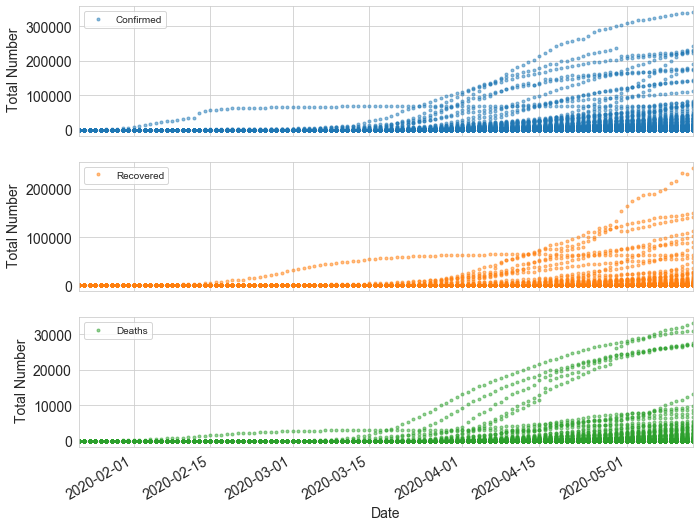

In [42]:
cols_plot = ['Confirmed', 'Recovered', 'Deaths']
axes = corona_time[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel(' Total Number')
plt.show()

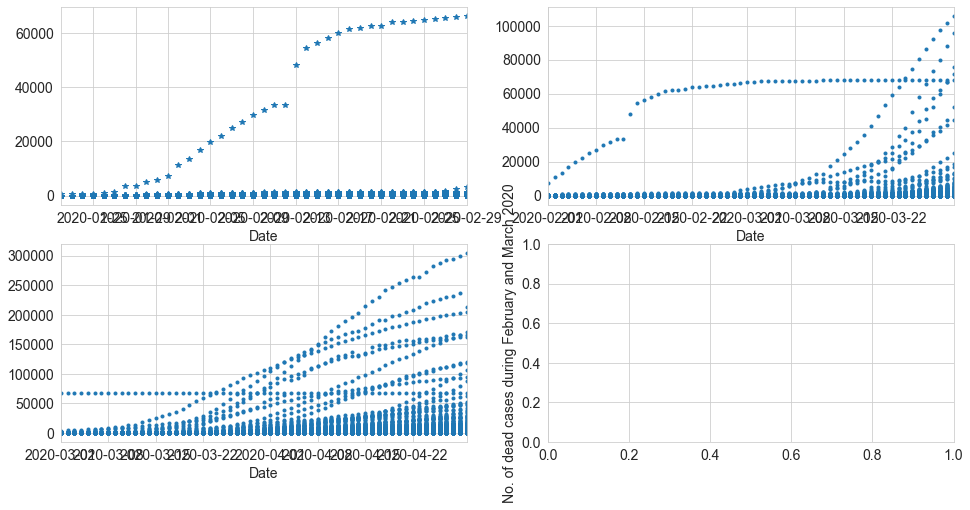

In [43]:
plt.rcParams['figure.figsize']=(16,8)
fig, axs = plt.subplots(2,2)
ax = corona_time.loc['2020-01':'2020-02', 'Confirmed'].plot(marker='*', linestyle='None', figsize=(11, 9), ax=axs[0,0], subplots=True)
ax = corona_time.loc['2020-02':'2020-03', 'Confirmed'].plot(marker='.', linestyle='None', figsize=(11, 9), ax=axs[0,1], subplots=True)
ax = corona_time.loc['2020-03':'2020-04', 'Confirmed'].plot(marker='.', linestyle='None', figsize=(11, 9), ax=axs[1,0], subplots=True)
plt.ylabel('No. of dead cases during February and March 2020')
plt.show()

# Regression

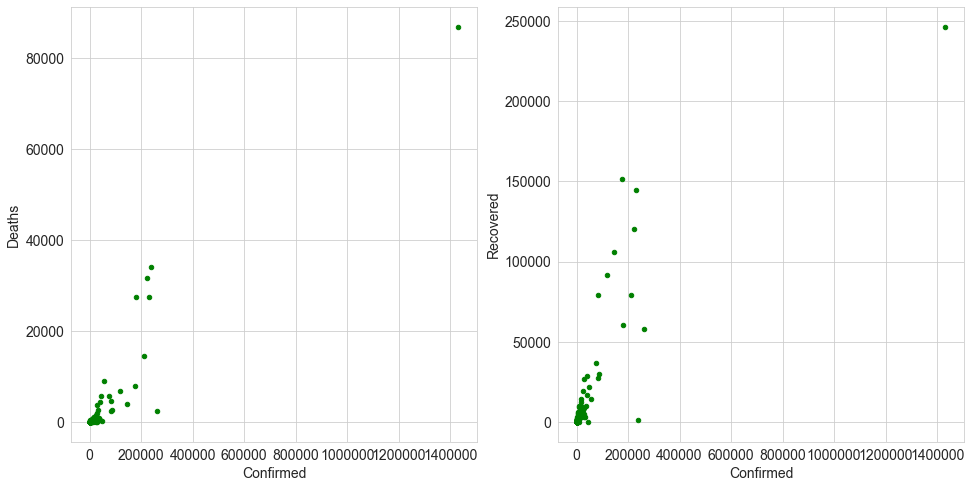

In [44]:
plt.rcParams['figure.figsize']=(16,8)
fig, axs = plt.subplots(1, 2)
sort_by_death.plot(kind='scatter', y='Deaths', x='Confirmed', ax=axs[0], colors='green')
sort_by_death.plot(kind='scatter', y='Recovered', x='Confirmed', ax=axs[1], colors='green')
plt.show()

# Forcasting-Train and Split

In [45]:
corona_time.head(3)

,Province_State,Country_Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0


In [46]:
corona_time_split = corona_time.drop(['Province_State', 'Country_Region'], axis=1)

In [47]:
corona_time_split1=corona_time_split.drop(['Deaths', 'Recovered'], axis=1)

In [48]:
corona_time_split1;

In [49]:
i_split = int(0.95*len(corona_time_split1))
df_train, df_test = corona_time_split1.iloc[:i_split,:], corona_time_split1.iloc[i_split:,:]
print('Train und Test are zustogether  {} input.'.format(len(df_train)+len(df_test)))
print('Forecast mus have just {} Periods.'.format(len(df_test)))

Train und Test are zustogether  24451 input.
Forecast mus have just 1223 Periods.


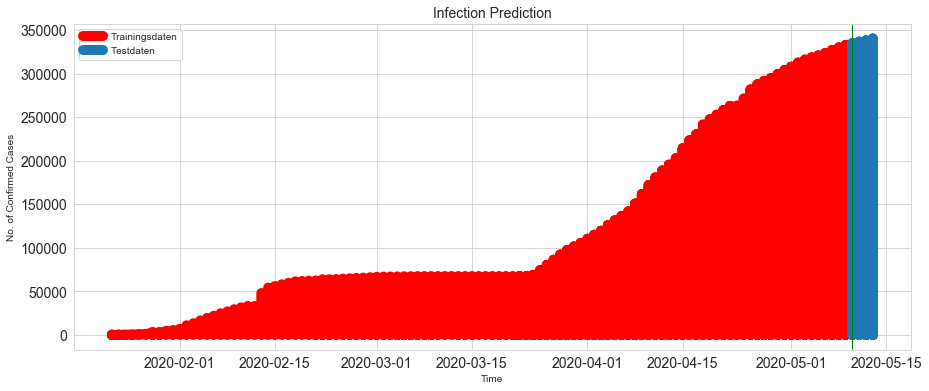

In [50]:
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_train.index, df_train.values, label='Trainingsdaten',color = 'red', ls='-')
plt.plot(df_test.index, df_test.values, label='Testdaten')
plt.axvline(x = corona_time_split1.index[i_split], linewidth=1, color='green', ls='-')
plt.legend(loc=2, fontsize=10)
plt.title('Infection Prediction', fontsize=14)
plt.xlabel('Time', fontsize=10)
plt.ylabel('No. of Confirmed Cases', fontsize=10)
plt.show()